<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries-and-dataframe" data-toc-modified-id="Import-Libraries-and-dataframe-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries and dataframe</a></span></li><li><span><a href="#Prices-per-oz-vs-Rating" data-toc-modified-id="Prices-per-oz-vs-Rating-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prices per oz vs Rating</a></span></li><li><span><a href="#Distribution-of-Ratings" data-toc-modified-id="Distribution-of-Ratings-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Distribution of Ratings</a></span></li><li><span><a href="#Agtron" data-toc-modified-id="Agtron-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Agtron</a></span></li></ul></div>

# Import Libraries and dataframe

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams

plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import itertools
import statsmodels.api as sm
import operator

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

import time

import re
from bs4 import BeautifulSoup
import requests
import urllib.request
from urllib.request import Request, urlopen

In [2]:
df = pd.read_csv('cleaned_coffee_reviews.csv')

In [4]:
df.columns
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Coffee Name,Roaster Name,Roaster Location,Coffee Origin,Rating,Roast Level,Review Date,Price,Agtron,Flavor,Body,Aroma,Aftertaste,Acidity,Bottom Line,Prices Per Oz,Agtron Whole,Agtron Ground,Coffee Country
0,Costa Rica Luis Campos Anaerobic,Revel Coffee,"Billings, Montana","Tarrazu, Costa Rica",94,Medium-Light,April 2020,$23.00/12 ounces,58/76,9,9,9,8,9.0,Enjoying this Costa Rica evokes the pleasures ...,1.92,58,76,Costa Rica
1,Colombia Granja La Esperanza Tres Dragones,PT's Coffee Roasting Co.,"Topeka, Kansas","Valle del Cauca growing region, Colombia",94,Medium-Light,April 2020,$23.50/12 ounces,60/74,9,9,9,8,9.0,A bombshell of a coffee with enough personalit...,1.96,60,74,Colombia
2,Colombia Finca La Loma Microlot,BeanFruit Coffee Co.,"Jackson, Mississippi","Huila, Colombia",94,Medium-Light,March 2020,$16.50/12 ounces,58/76,9,9,9,8,9.0,An exceptional Colombia cup with sweet and tar...,1.38,58,76,Colombia
3,Dukunde Kawa Rwanda,JBC Coffee Roasters,"Madison, Wisconsin","Musasa, Rwanda",93,Medium-Light,March 2020,$16.25/12 ounces,56/74,9,9,9,8,8.0,A deep yet delicate cup redolent with crisp fr...,1.35,56,74,Rwanda
4,Buzira Burundi Natural,JBC Coffee Roasters,"Madison, Wisconsin","Murutra, Kayanza Province, Burundi",92,Medium-Light,March 2020,$18.20/12 ounces,58/76,9,8,9,8,8.0,An exceptionally cleanly expressed natural-pro...,1.52,58,76,Burundi


In [ ]:
# visualization ideas

#  1. Map of world with coffee origin plotted, w layers
#  https://gis.stackexchange.com/questions/198530/plotting-us-cities-on-a-map-with-matplotlib-and-basemap
#  2. done: price v rating
#  3. rating v agtron or agtron v origin
#  4. confusion matrix
#  5. done: Distribution of ratings
#  6. Feature importance

# https://towardsdatascience.com/walkthrough-mapping-basics-with-bokeh-and-geopandas-in-python-43f40aa5b7e9
# https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0

# Prices per oz vs Rating

In [ ]:
# Phoenix[['RegionName','growth2']].sort_values(by='growth2',ascending=False).plot.bar(x='RegionName', y='growth2',figsize=(40,30))
# plt.title('ROI Growth (post 2008 Crash) for Zip Codes in Phoenix, AZ', fontsize=30)
# plt.legend('')
# plt.xlabel('zipcodes', fontsize =20)
# plt.ylabel('Growth percentage', fontsize=20)

# result.plot.bar(x='RegionName', y='growth2', figsize=(10,10))
# plt.title('Top 13 Zipcodes in US: CA, AZ and NV', fontsize=25)
# plt.xlabel('zip codes')
# plt.legend('')
# plt.ylabel('Growth percentage')

# fig, ax = plt.subplots(figsize=(25,15))
# plt.bar(CA_x,CA_y, color = '#1c3290', label = "CA mean: {}".format(CA_mean))
# plt.bar(NV_x, NV_y, color = "#901c32", label = "NV mean: {}".format(NV_mean))
# plt.bar(AZ_x, AZ_y, color = "#32901c", label = "AZ mean: {}".format(AZ_mean))
# plt.title("Top 13 US Zip Codes", fontsize = 35)
# plt.xlabel("Zip Codes", fontsize=30)
# plt.ylabel("Growth % Since 2011", fontsize = 25)
# plt.legend()
# plt.show()

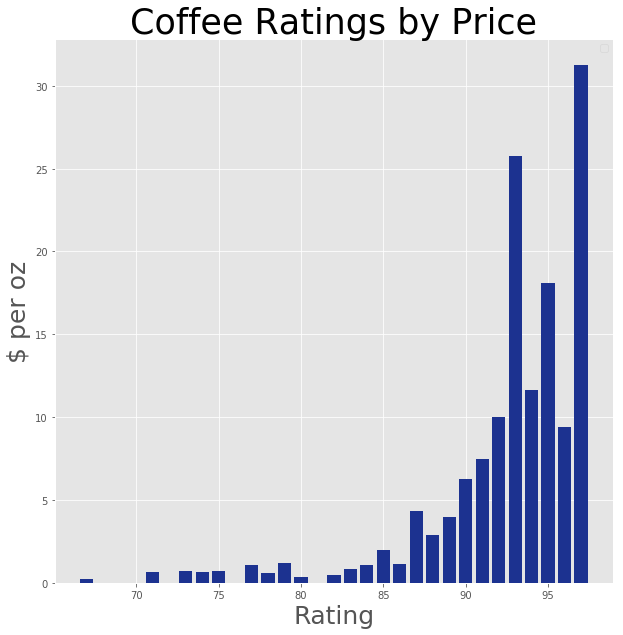

In [18]:
# The scale on the y-axis is funky!!!


x = df['Rating']
y = df['Prices Per Oz']
fig = plt.figure(figsize=(10,10))

plt.bar(x,y, color = '#1c3290', label = "")
plt.xlabel("Rating", fontsize =25)
plt.ylabel("$ per oz", fontsize = 25)
plt.title("Coffee Ratings by Price", fontsize =35)
plt.legend("")
plt.show()

# Distribution of Ratings

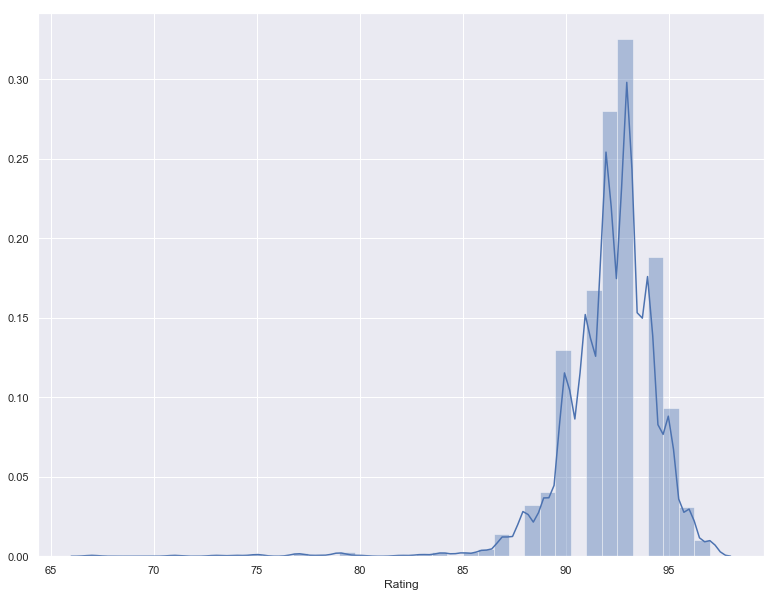

In [19]:
sns.set(rc={'figure.figsize':(13,10)})
sns.distplot(df['Rating'], bins=40)
plt.show()

# Agtron

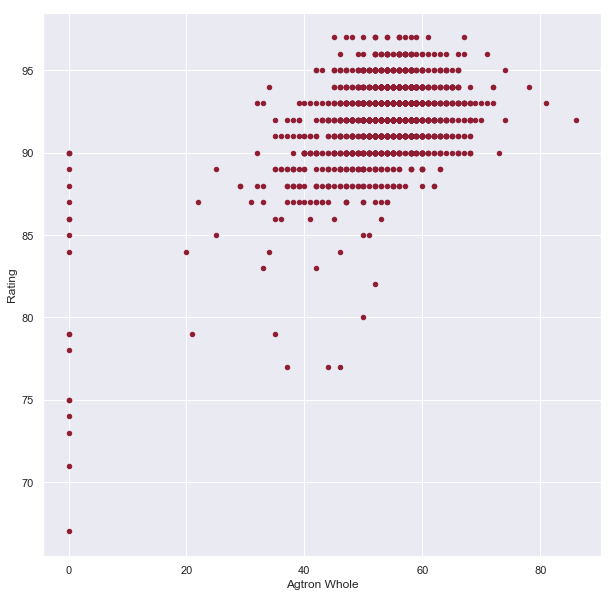

In [20]:
df.plot.scatter(x='Agtron Whole', y='Rating', c='#901c32', figsize=(10,10), title="")

In [26]:
df['Agtron Whole'].nunique

<bound method IndexOpsMixin.nunique of 0       58
1       60
2       58
3       56
4       58
5       60
6       58
7       56
8       52
9       52
10      54
11      56
12      57
13      59
14      58
15      55
16      47
17      56
18      58
19      58
20      52
21      54
22      58
23      56
24      52
25      54
26      59
27      54
28      58
29      54
        ..
2165    50
2166    48
2167    29
2168    60
2169    50
2170    53
2171    40
2172    49
2173    51
2174    58
2175    46
2176    58
2177    74
2178    59
2179    44
2180     0
2181    55
2182    64
2183    43
2184    43
2185    62
2186    39
2187    41
2188    60
2189    59
2190    51
2191    66
2192    52
2193    54
2194    63
Name: Agtron Whole, Length: 2195, dtype: int64>